In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<h2>INCLUSIVE YEAR 2019 - 2022</h2>
<h3>Analyst: Khristian Rodas</h3>

In [2]:
accident = pd.read_csv("dataset//accident_data.csv")

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [7]:
for col in["Accident_Severity","Latitude", "Light_Conditions", "District Area", 
           "Longitude", "Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area",
          "Weather_Conditions", "Vehicle_Type"]:
    accident[col] = accident[col].astype('category')

accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = "coerce")

In [8]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [9]:
accident ['Year'] = accident ['Accident Date'].dt.year
accident ['Month'] = accident ['Accident Date'].dt.month
accident ['day'] = accident ['Accident Date'].dt.day
accident ['week'] = accident ['Accident Date'].dt.dayofweek

# accident ['Accident Date'] = accident ['Accident Date'].astype('str')
# accident.dtypes
# accident ['Accident Date'] = accident ['Accident Date'].str.strip()
# accident ['Accident Date'] = accident ['Accident Date'].str.replace('/','-')

<h1>Insight No. 1</h1>
<h2>What type of road has the highest fatal serverity accident?</h2>
<h3>The highest fatal serverity accident in a road is in a single carriageway</h3>

<h1>Insight No. 2</h1>
<h2>What type of road has the highest Serious serverity accident?</h2>
<h3>The highest Serious serverity accident in a road is in Single carriageway with 70540 value </h3>

<h1>Insight No. 3</h1>
<h2>What type of road has the highest Slight serverity accident?</h2>
<h3>The highest Slight serverity accident in a road is in Single carriageway with 419563 value </h3>

In [79]:
ra_severity = accident.groupby(["Road_Type", "Accident_Severity"]).size()

In [80]:
ra_severity2 = accident[accident['Road_Type'] != 'Single carriageway']

<h1>Due to outlier, I decided to remove the Road_type Single carriageway to atleast visualized those closed values column</h1>

In [85]:
ra_severity3 = ra_severity2.groupby(["Road_Type", "Accident_Severity"]).size()

In [86]:
ra_severity3.unstack()

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,0,0,0
Slip road,49,611,6381


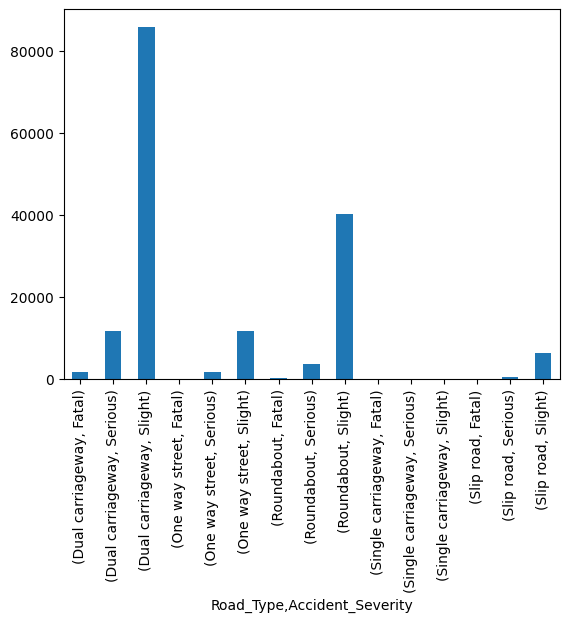

In [88]:
ra_severity3.plot(kind='bar')
plt.show()

<h1>Activity 4: Added Insight: 1</h1>
<h2>Data Visualization of Fatal Category of Accident Severity based on Road types</h2>

In [92]:
car_sev = accident.groupby(accident["Road_Type"],["Accident_Severity"]=='Fatal').size()

In [93]:
car_sev

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    496663
Slip road               7041
dtype: int64

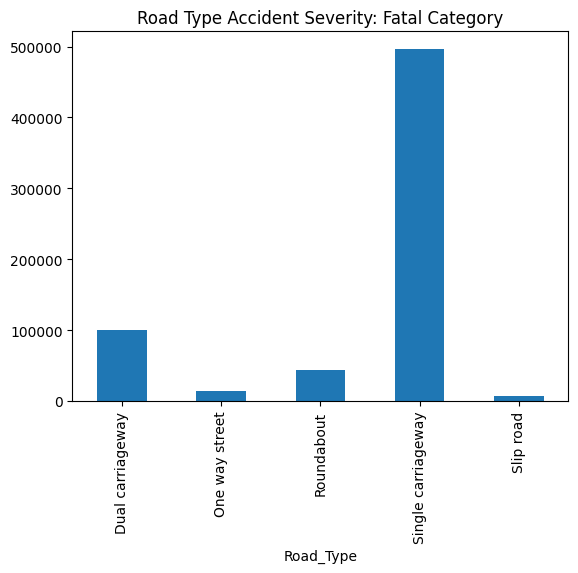

In [94]:
car_sev.plot(kind="bar")
plt.title('Road Type Accident Severity: Fatal Category')
plt.show()

<h1>Insight No. 4</h1>
<h2>Does accidents happens more in urban areas?</h2>
<h3>Accidents happens mostly in urban areas with 421678 value</h3>

In [110]:
Urban2 = accident[accident['Urban_or_Rural_Area'] != 'Unallocated']
UrbanRural = Urban2["Urban_or_Rural_Area"].value_counts()


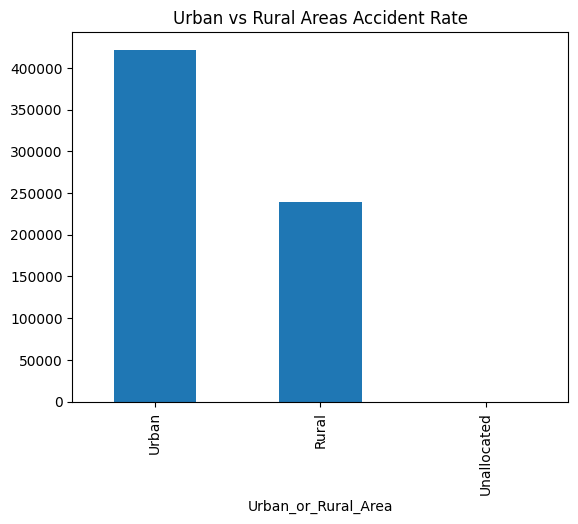

In [112]:
UrbanRural.plot(kind = "bar")
plt.title('Urban vs Rural Areas Accident Rate')
plt.show()

<h1>Insight No. 5</h1>
<h2>What is the average number of casualties? </h2>
<h3>The average number of casualties is 1.4 </h3>

In [105]:
avg_casualties = np.round(accident['Number_of_Casualties'].mean(), 1)

In [108]:
avg_casualties.plot()
plt.title('Average Casualties')
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'plot'

<h1>Insight No. 6</h1>
<h2>What is the average number of vehicles in an accident? </h2>
<h3>The average number of vehicles in an accident is 1.8 </h3>

In [113]:
avg_vehicles = np.round(accident['Number_of_Vehicles'].mean(), 1)

In [114]:
avg_vehicles

np.float64(1.8)

<h1>Insight No. 7</h1>
<h2>What road surface conditions has the highest number of accident?</h2>
<h3>The road surface conditions that has the highest accident is a dry surface.</h3>

In [120]:
roadsurface_accidents = accident['Road_Surface_Conditions'].value_counts()
roadsurface_accidents

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

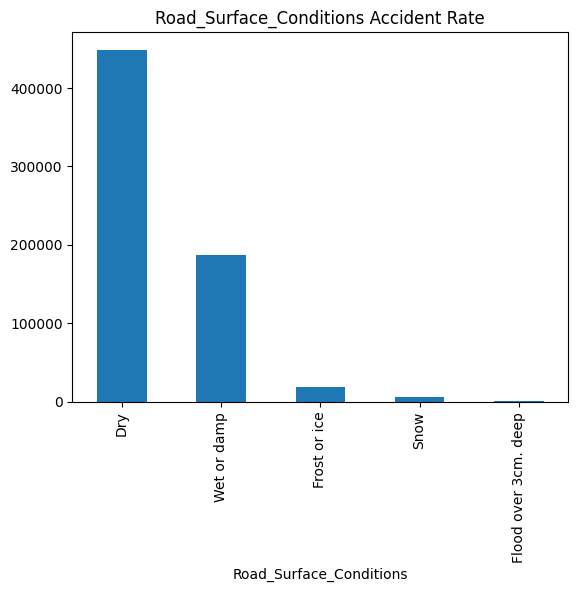

In [121]:
roadsurface_accidents.plot(kind="bar")
plt.title('Road_Surface_Conditions Accident Rate')
plt.show()

<h1>Insight No. 8</h1>
<h2>What is the most common accident severity ? </h2>
<h3>The most common accident severity is 'Slight'</h3>

In [125]:
avg_severity = accident['Accident_Severity'].mode()[0]

In [130]:
avg_severity

'Slight'

<h1>Insight No. 9</h1>
<h2>What year has the has the higher number of casualties?</h2>
<h3>2019 has a higher number of casualties</h3>

In [135]:
area_casualties = accident.groupby('Year')['Number_of_Casualties'].sum()

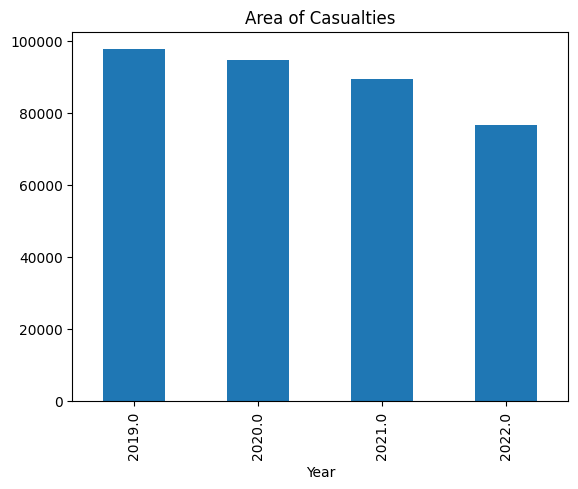

In [136]:
area_casualties.plot(kind = "bar")
plt.title('Area of Casualties')
plt.show()

<h1>Insight No. 10</h1>
<h2>What light conditions has the highest number of accident?</h2>
<h3>On Daylight has the highest number of accidents</h3>

In [137]:
lightCdt_accidents = accident['Light_Conditions'].value_counts()

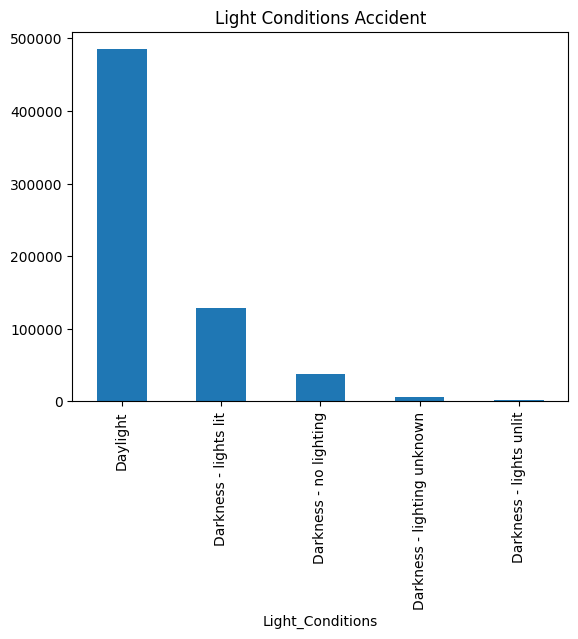

In [138]:
lightCdt_accidents.plot(kind = 'bar')
plt.title('Light Conditions Accident')
plt.show()

<h1>Insight No. 11</h1>
<h2>whats weather conditions has the highest number of accident?</h2>
<h3>Fine no high winds has the highest number of accidents</h3>

In [139]:
weatherCdt_accidents = accident['Weather_Conditions'].value_counts()

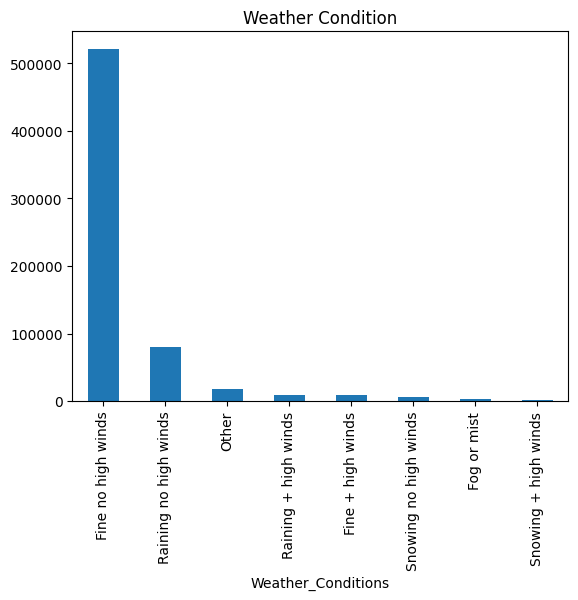

In [140]:
weatherCdt_accidents.plot(kind = "bar")
plt.title('Weather Condition')
plt.show()

<h1>Insight No. 12</h1>
<h2>What is the average number of casualties in the urban, rural and unallocated areas?</h2>
<h3>The average number of casualties for rural area accidents is 1.5, for the urban area is 1.3 , and for unallocated areas is 1.2.</h3>

In [141]:
avg_casualties_per_area = np.round(accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean(), 1)

In [142]:
avg_casualties_per_area

Urban_or_Rural_Area
Rural          1.5
Unallocated    1.2
Urban          1.3
Name: Number_of_Casualties, dtype: float64

<h1>Insight No. 13</h1>
<h2>What is the average number of casualties in each weather conditions?</h2>
<h3>TFine with no winds, fine with high winds, raining with high winds, raining with no winds, snowing with high winds, and other weather conditions have an average of 1.4 casualties, then snowing with no high winds has an average of 1.3 casualties, while fog or mist has 1.5 casualties.</h3>

In [143]:
avg_casualties_per_weather = np.round(accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean(), 1)

In [145]:
avg_casualties_per_weather

Weather_Conditions
Fine + high winds        1.4
Fine no high winds       1.4
Fog or mist              1.5
Other                    1.4
Raining + high winds     1.4
Raining no high winds    1.4
Snowing + high winds     1.4
Snowing no high winds    1.3
Name: Number_of_Casualties, dtype: float64

<h1>Insight No. 14</h1>
<h2>What road area has the higher number of accidents categorized in Rural and Urban Areas?</h2>
<h3>Urban roads have a higher accidents than roads in rural areas.</h3>

In [154]:
accidents_per_area_road = accident.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().unstack().T

In [155]:
accidents_per_area_road

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Type,,,
Dual carriageway,48715,1,50708
One way street,1193,0,12366
Roundabout,15545,1,28446
Single carriageway,169243,9,327411
Slip road,4294,0,2747


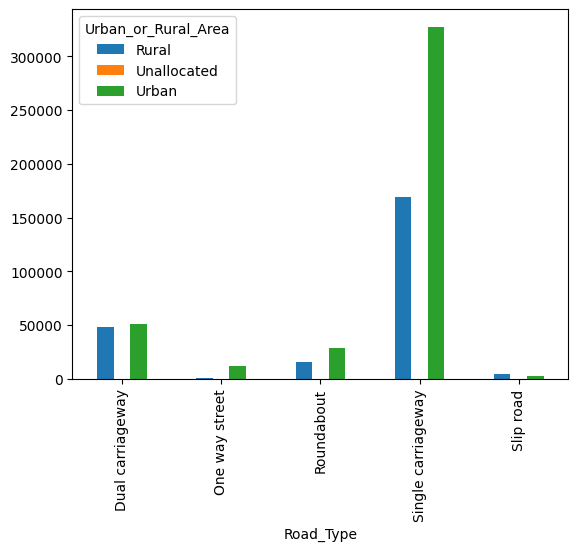

In [162]:
accidents_per_area_road.plot(kind="bar")
plt.show()

<h1>Insight No. 15</h1>
<h2>Weather and light conditions result in the highest number of casualties?</h2>
<h3>Daylight and fine with no high winds have the highest number of casualties.</h3>

In [160]:
casualties_by_weather_light = accident.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()

In [163]:
casualties_by_weather_light

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Weather_Conditions,,,,,
Fine + high winds,82,2543,75,1213,7943
Fine no high winds,4903,125686,2251,38800,531805
Fog or mist,89,1323,48,1267,2399
Other,234,6535,177,2824,13466
Raining + high winds,147,4185,115,2173,7001
Raining no high winds,808,31563,620,9538,69700
Snowing + high winds,21,354,7,247,626
Snowing no high winds,119,2411,37,1129,4674


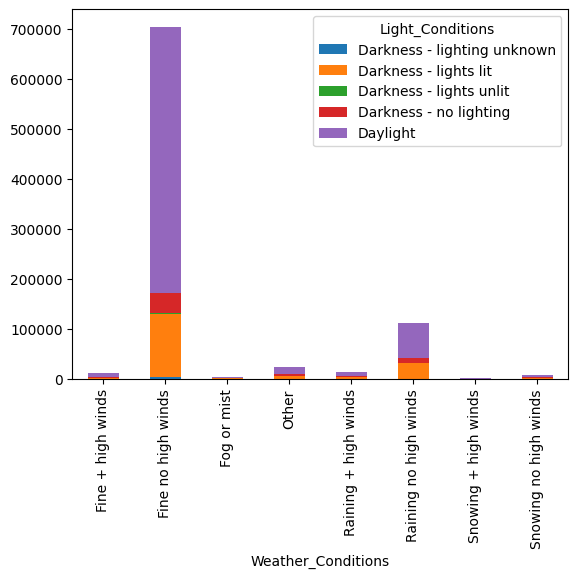

In [159]:
casualties_by_weather_light.plot(kind="bar",stacked=True)
plt.show()

<h1>Insight No. 16</h1>
<h2>Does having more vehicles involve results to more casualties?</h2>
<h3>No, having more vehicles doesn't mean more casualties.</h3>
<h3>The number of vehicles has no correlation with the number of casualties</h3>

In [164]:
vehicles_casualties_corr = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

In [165]:
vehicles_casualties_corr

np.float64(0.22888886126927557)

<h1>Insight No. 17</h1>
<h2>What vehicle type has the highest number of accidents</h2>
<h3>The car has the highest number of accidents but I chose to remove it from the output to show the other valuable data that is close to each other</h3>

In [176]:
vehicletype_accidents = accident['Vehicle_Type'].value_counts()

In [177]:
vehicle_no_car = accident[accident['Vehicle_Type'] != 'Car']

In [185]:
vehicletype_accidents2 = vehicle_no_car['Vehicle_Type'].value_counts()


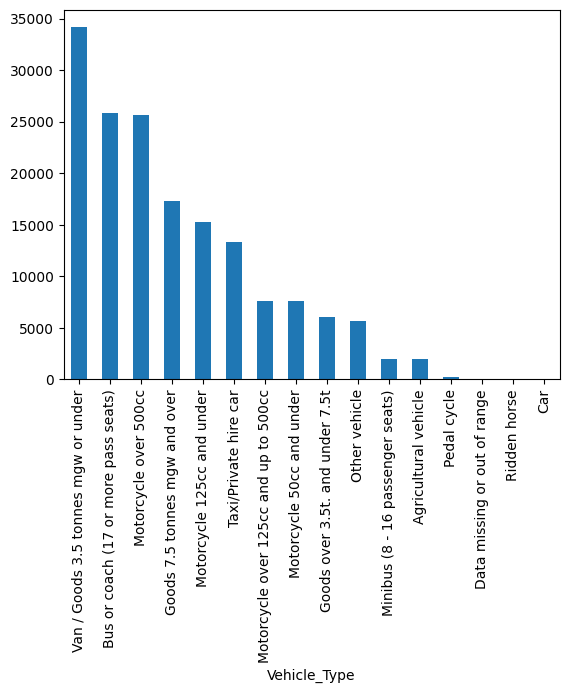

In [187]:
vehicletype_accidents2.plot(kind="bar",stacked=True)
plt.show()

<h1>Insight No. 18</h1>
<h2>What district area has the highest number of accidents</h2>
<h3>Birmingham has the highest number of accidents</h3>

In [188]:
districtarea_accidents = accident['District Area'].value_counts()

In [189]:
districtarea_accidents

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

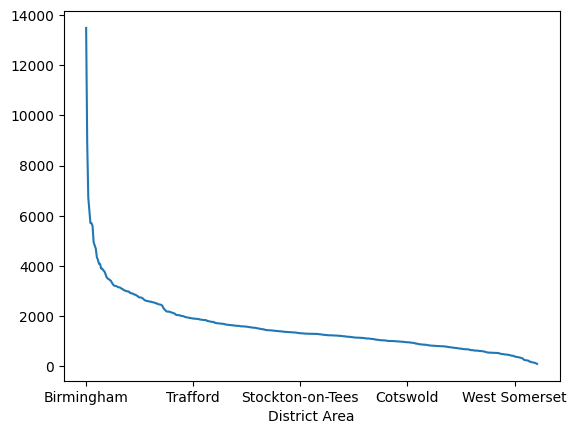

In [193]:
districtarea_accidents.plot()
plt.show()

<h1>Insight No. 19</h1>
<h2>Which district area has the highest average number of casualties?</h2>
<h3>Blaeu Gwent has the highest average number of casualties</h3>

In [190]:
avg_casualties_per_district = np.round(accident.groupby('District Area')['Number_of_Casualties'].mean(), 1).sort_values(ascending = False)

In [191]:
avg_casualties_per_district

District Area
Blaeu Gwent                1.7
Merthyr Tydfil             1.6
North East Lincolnshire    1.6
Blaenau Gwent              1.6
Teesdale                   1.6
                          ... 
Kensington and Chelsea     1.1
Hammersmith and Fulham     1.1
City of London             1.1
Camden                     1.1
Aberdeen City              1.1
Name: Number_of_Casualties, Length: 422, dtype: float64

<h1>Insight No. 20</h1>
<h2>Do different road surface conditions impact the number of casualties?</h2>
<h3>The road surface conditions impact the number of casualties</h3>
<h3>There is correlation between road surface condtions and number of casualties</h3>

In [ ]:
dry = accident[accident['Road_Surface_Conditions'] == 'Dry']['Number_of_Casualties']
wet = accident[accident['Road_Surface_Conditions'] == 'Wet or damp']['Number_of_Casualties']
f_stat, p_value = f_oneway(dry, wet)
print(p_value)